<h1>Andres Julian López Hurtado|Rodrigo Ildefonso Roman Guzman|María de la Paz Rico Fernández|Semana 9 (Noviembre 14 2022)</h1>

<h1>Aguas Subterraneas</h1>

In [ ]:
import pandas as pd
import numpy as np

#Importamos la base de datos de un vinculo a Google Drive
#Superficiales
# url = 'https://drive.google.com/file/d/1fXd6I_3oxXO-P6OrtRkVKbV0ZLttR2Dt/view?usp=sharing'
url = 'https://drive.google.com/file/d/1tQQ3xBMjld7WZzbFrTuWW5xD5UEtMW9x/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path,encoding = "ISO-8859-1")
print('Contamos con {} datos'.format(df.shape[0]))

#Dado que muchos datos pueden estar codificados de manera diferente para los valores nulos
#vamos a estandarizar la manera de representarlos
df = df.replace(['NO DATA','N/A', 0,'ND', '','NaN'],np.nan)

df.iloc[:100,0:30]


Contamos con 1068 datos


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DLCHI345,EL SAUZ-ENCINILLAS 2,RIO BRAVO,CHIHUAHUA,CHIHUAHUA,EL SAUZ-ENCINILLAS,POZO,-106.25620,29.06838,2020,...,135.6328,Potable - Dura,<1.1,Potable - Excelente,6.572807,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente
96,DLCHI359M1,MEOQUI-DELICIAS (21-A),RIO BRAVO,CHIHUAHUA,DELICIAS,MEOQUI-DELICIAS,POZO,-105.39353,28.23409,2020,...,653.136,Muy dura e indeseable usos industrial y domestico,<1.1,Potable - Excelente,7.574602,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente
97,DLCHI364M1,MEOQUI-DELICIAS (M-28),RIO BRAVO,CHIHUAHUA,JULIMES,MEOQUI-DELICIAS,POZO,-105.41464,28.42294,2020,...,428.839,Potable - Dura,14136,Fuertemente contaminada,2.926973,Potable - Excelente,0.1113,No apta como FAAP,<0.003,Potable - Excelente
98,DLCHI379,LOS JUNCOS 2,RIO BRAVO,CHIHUAHUA,OJINAGA,LOS JUNCOS,POZO,-104.66156,28.99189,2020,...,79.168,Potable - Moderadamente suave,697,Aceptable,3.75019,Potable - Excelente,0.0606,No apta como FAAP,<0.003,Potable - Excelente


<h3>Explorando los datos</h3>

In [ ]:
#Antes de graficar. Vamos a transformar el tipo de las variables que indican la presencia de 
#elementos en el agua. Actualmente estan en tipo objeto y vamos a cambiarlas a tipo float64
df['ALC_mg/L'] = df['ALC_mg/L'].astype(float)    

df['CONDUCT_mS/cm'] = df['CONDUCT_mS/cm'].astype(float)

# remplazamos valores como <25 por uno concreto que respete la logica que expresa
# para poder transformarlo al tipo adecuado
df['SDT_M_mg/L'][df.index[df['SDT_M_mg/L']=='<25'][0]] = '24'
df['SDT_M_mg/L'] = df['SDT_M_mg/L'].astype(float)

df['FLUORUROS_mg/L'][df.index[df['FLUORUROS_mg/L']=='<0.2'].tolist()] = '0.19'
df['FLUORUROS_mg/L'] = df['FLUORUROS_mg/L'].astype(float)

df['DUR_mg/L'][df.index[df['DUR_mg/L']=='<20'].tolist()] = '19'
df['DUR_mg/L'] = df['DUR_mg/L'].astype(float)

# Cambiamos <1.1
df['COLI_FEC_NMP/100_mL'][df.index[df['COLI_FEC_NMP/100_mL']=='<1.1'].tolist()] = '1.0'
df['COLI_FEC_NMP/100_mL'] = df['COLI_FEC_NMP/100_mL'].astype(float)

# Cambiamos <0.02 por 0.01
df['N_NO3_mg/L'][df.index[df['N_NO3_mg/L']=='<0.02'].tolist()] = '0.01'
df['N_NO3_mg/L'] = df['N_NO3_mg/L'].astype(float)

df['AS_TOT_mg/L'][df.index[df['AS_TOT_mg/L']=='<0.01'].tolist()] = '0.009'
df['AS_TOT_mg/L'] = df['AS_TOT_mg/L'].astype(float)   

df['CD_TOT_mg/L'][df.index[df['CD_TOT_mg/L']=='<0.003'].tolist()] = '0.002'
df['CD_TOT_mg/L'] = df['CD_TOT_mg/L'].astype(float)

df['CR_TOT_mg/L'][df.index[df['CR_TOT_mg/L']=='<0.005'].tolist()] = '0.004'
df['CR_TOT_mg/L'] = df['CR_TOT_mg/L'].astype(float)

df['HG_TOT_mg/L'][df.index[df['HG_TOT_mg/L']=='<0.0005'].tolist()] = '0.0004'
df['HG_TOT_mg/L'] = df['HG_TOT_mg/L'].astype(float)      

df['PB_TOT_mg/L'][df.index[df['PB_TOT_mg/L']=='<0.005'].tolist()] = '0.004'
df['PB_TOT_mg/L'] = df['PB_TOT_mg/L'].astype(float)  

df['MN_TOT_mg/L'][df.index[df['MN_TOT_mg/L'] =='<0.0015'].tolist()] = '0.0014'
df['MN_TOT_mg/L'] = df['MN_TOT_mg/L'].astype(float)  

df['FE_TOT_mg/L'][df.index[df['FE_TOT_mg/L'] =='<0.025'].tolist()] = '0.024'
df['FE_TOT_mg/L'] = df['FE_TOT_mg/L'].astype(float)


#Creamos una copia antes de eliminar columnas para usarla despues
df_copy = df.copy(deep=False)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/pyth

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

<h3>Estandarizamos los datos</h3>

In [ ]:
#Hay muchas variables de las que podemos precindir. A continuacion realizamos 
#una reduccion de las variables que tomaremos en cuenta

#La clave es unicamente un identificador y no lo necesitamos
df.drop('CLAVE', axis=1, inplace=True)

#Las variables que removemos a continuacion tienen un proposito de 
#relacionar las muestras con una ubicacion en particular.
#Sin embargo para nuestro porposito solo ocuparemos latitud y longitud
df.drop('SITIO', axis=1, inplace=True)
df.drop('ORGANISMO_DE_CUENCA', axis=1, inplace=True)
df.drop('ESTADO', axis=1, inplace=True)
df.drop('MUNICIPIO', axis=1, inplace=True)
df.drop('ACUIFERO', axis=1, inplace=True)
df.drop('SUBTIPO', axis=1, inplace=True)

#Removemos el año porque no hay variabilidad relevante en este sentido
df.drop('PERIODO', axis=1, inplace=True)


#Tiramos la columna de contaminates porque esta bastante incompleta y ademas
#Aporta datos especificos que no necesitamos porque ademas son redundantes
#(enumera los elementos que no cumplieron)
df.drop('CONTAMINANTES',axis=1,inplace=True)  

df.iloc[0:10,0:20]


,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS
0,-102.022100,22.208870,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.0,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP
1,-102.200750,21.999580,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.0,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP
2,-102.288010,22.366850,204.920,Alta,532.0,Buena para riego,NaN,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.0,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP
3,-102.294490,22.184350,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.0,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP
4,-110.244800,23.451380,309.885,Alta,1841.0,Permisible para riego,NaN,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0090,Potable - Excelente
5,-110.220670,23.464930,224.475,Alta,570.3,Buena para riego,NaN,554.8,Cultivos sensibles,Potable - Dulce,0.2756,Baja,201.8784,Potable - Dura,6131.0,Contaminada,8.555740,Potable - Buena calidad,0.0090,Potable - Excelente
6,-110.213960,23.474600,203.670,Alta,531.0,Buena para riego,NaN,278.8,Excelente para riego,Potable - Dulce,0.2890,Baja,166.2528,Potable - Dura,110.0,Buena calidad,4.686470,Potable - Excelente,0.0090,Potable - Excelente
7,-109.907306,22.890500,350.760,Alta,2253.3,Dudosa para riego,NaN,1160.2,Cultivos con manejo especial,Ligeramente salobres,0.5607,Media,269.1712,Potable - Dura,798.0,Aceptable,27.600998,No apta como FAAP,0.0090,Potable - Excelente
8,-110.088778,23.799861,343.655,Alta,1114.0,Permisible para riego,NaN,672.0,Cultivos sensibles,Potable - Dulce,0.3421,Baja,403.8482,Potable - Dura,146.0,Buena calidad,1.877325,Potable - Excelente,0.0090,Potable - Excelente
9,-110.054722,23.824722,332.605,Alta,1703.0,Permisible para riego,NaN,1017.8,Cultivos con manejo especial,Ligeramente salobres,0.5088,Media,559.0214,Muy dura e indeseable usos industrial y domestico,3873.0,Contaminada,0.143061,Potable - Excelente,0.3558,No apta como FAAP


<h2>Segunda parte<h2>
<h4><li>Arbol de decision y random forest</li></h4>

In [ ]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
final_df = df.copy()
final_df.fillna(final_df.mean(),inplace=True)
#Separamos la variable objetivo de las de entrenamiento
train_copy = final_df[['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
                 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']].copy() 
# train_copy.drop(labels = ['SEMAFORO'],axis = 1,inplace = True)
X = train_copy # Caracteristicas
y = final_df[['SEMAFORO']] # Objetivo
print(X)
print(y)


      ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0      229.990          940.0    603.6000          0.9766  213.7320   
1      231.990          608.0    445.4000          0.9298  185.0514   
2      204.920          532.0    342.0000          1.8045  120.7190   
3      327.000          686.0    478.6000          1.1229  199.8790   
4      309.885         1841.0   1179.0000          0.2343  476.9872   
...        ...            ...         ...             ...       ...   
1063   231.045         2350.0   1545.8000          0.1900  752.0960   
1064   256.000          529.0    297.0000          0.1900  273.0000   
1065   330.690         2600.0   1873.0000          0.7574  660.2126   
1066   193.140          873.0    690.6667          0.7108  406.3680   
1067   263.070          817.0    495.0000          0.4002  362.5440   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0                     1.0    4.184656       0.0161        0.002    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


<p>Primero entrenaremos con todas la variables</p>

In [ ]:
#Separamos las variables en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% entrenamiento y 30% prueba

In [ ]:
for i in range(3,25):
  clf = DecisionTreeClassifier(max_depth=i)

  #Entrenamos el con el arbol de decision
  clf = clf.fit(X_train,y_train)

  #Predecimos un set de objetivos
  y_pred = clf.predict(X_test)


  #Revisemos la precision del modelo
  print("Precision {}: ".format(i),metrics.accuracy_score(y_test, y_pred))


Precision 3:  0.7975077881619937
Precision 4:  0.8193146417445483
Precision 5:  0.8660436137071651
Precision 6:  0.9065420560747663
Precision 7:  0.9376947040498442
Precision 8:  0.9501557632398754
Precision 9:  0.9657320872274143
Precision 10:  0.9626168224299065
Precision 11:  0.9688473520249221
Precision 12:  0.9657320872274143
Precision 13:  0.9657320872274143
Precision 14:  0.9657320872274143
Precision 15:  0.9688473520249221
Precision 16:  0.9657320872274143
Precision 17:  0.9657320872274143
Precision 18:  0.9657320872274143
Precision 19:  0.9626168224299065
Precision 20:  0.9657320872274143
Precision 21:  0.9626168224299065
Precision 22:  0.9657320872274143
Precision 23:  0.9595015576323987
Precision 24:  0.9688473520249221


<p>Con un arbol de nivel 7 obtenemos un excelente resultado</p>

In [ ]:
clf = DecisionTreeClassifier(max_depth= 7)

#Entrenamos el con el arbol de decision
clf = clf.fit(X_train,y_train)

#Predecimos un set de objetivos
y_pred = clf.predict(X_test)


#Revisemos la precision del modelo
print("Precision {}: ".format(i),metrics.accuracy_score(y_test, y_pred))

Precision 24:  0.9376947040498442


<p>Vamos a visualizar el arbol por medio de la libreria graphviz</p>

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


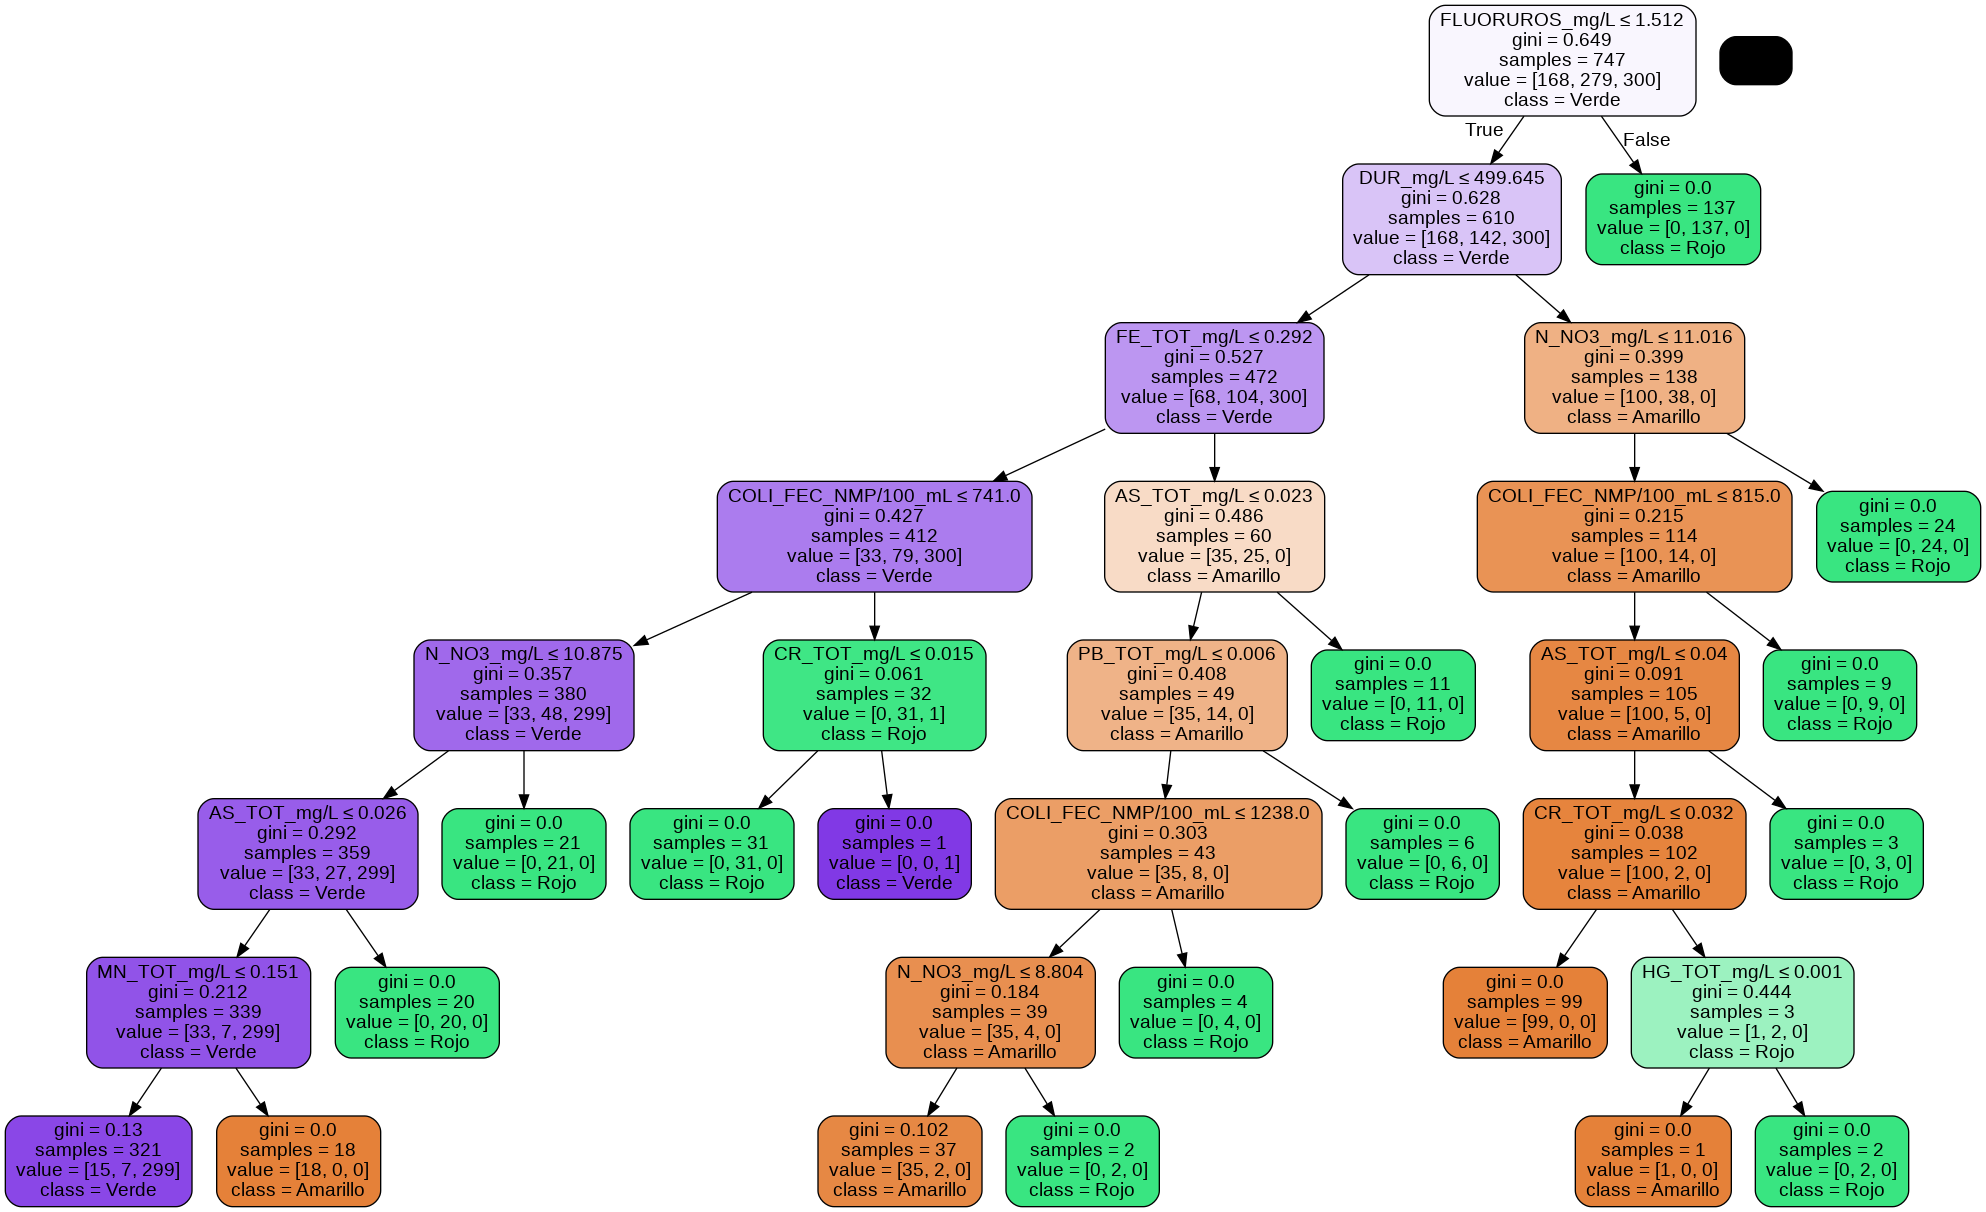

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,             #classes_ conserva la relacion correcta de las etiquetas
                special_characters=True,feature_names = train_copy.columns,class_names =clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('aguas_subterraneas.png')
Image(graph.create_png())

Importancia de cada una de las variables
ALC_mg/L  =  0.0
CONDUCT_mS/cm  =  0.0
SDT_M_mg/L  =  0.0
FLUORUROS_mg/L  =  0.23091303691618023
DUR_mg/L  =  0.1809391901537258
COLI_FEC_NMP/100_mL  =  0.13413732983794652
N_NO3_mg/L  =  0.1475809869065177
AS_TOT_mg/L  =  0.10875163636686411
CD_TOT_mg/L  =  0.0
CR_TOT_mg/L  =  0.010306663303096942
HG_TOT_mg/L  =  0.003036460783582307
PB_TOT_mg/L  =  0.015888457588512074
MN_TOT_mg/L  =  0.06896866996397533
FE_TOT_mg/L  =  0.09947756817959891


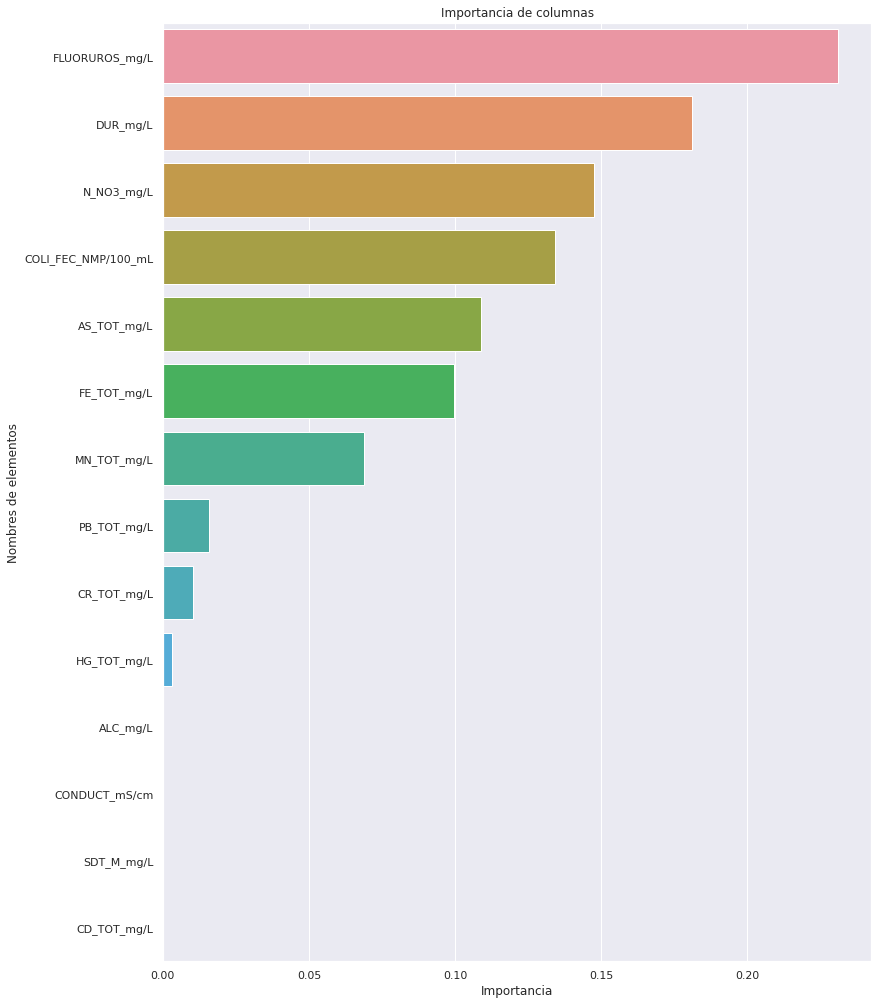

In [ ]:
import seaborn as sns

#Ahora tenemos una referencia clara de la importancia de cada variable
print('Importancia de cada una de las variables')
for i in range(len(clf.feature_names_in_)):
  print(clf.feature_names_in_[i],' = ',clf.feature_importances_[i])


#Vizualicemos la distribucion de las variables
%matplotlib inline
sns.set(rc={'figure.figsize':(12.7,17.27)})
# Creamos una grafica horintal
featNamesImp = pd.DataFrame(clf.feature_importances_).T
featNamesImp.columns = clf.feature_names_in_.tolist()
featNamesImp.sort_values(by =0, axis=1,inplace=True,ascending=False)
sns.barplot(data=featNamesImp,orient = 'h')

plt.xlabel('Importancia')
plt.ylabel('Nombres de elementos')
plt.title("Importancia de columnas")
plt.show()



<p>Podemos reducir el tamaño de nuestro arbol sin perder mucha informacion</p>

In [ ]:
final_df = df.copy()
final_df.fillna(final_df.mean(),inplace=True)
#Separamos la variable objetivo de las de entrenamiento
train_copy = final_df[['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
                 'N_NO3_mg/L', 'AS_TOT_mg/L', 'FE_TOT_mg/L']].copy() 
# train_copy.drop(labels = ['SEMAFORO'],axis = 1,inplace = True)
X = train_copy # Caracteristicas
y = final_df[['SEMAFORO']] # Objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba
clf = DecisionTreeClassifier(max_depth=5)

#Entrenamos el con el arbol de decision
clf = clf.fit(X_train,y_train)

#Predecimos un set de objetivos
y_pred = clf.predict(X_test)


#Revisemos la precision del modelo
print("Precision:",metrics.accuracy_score(y_test, y_pred))

Precision: 0.9065420560747663


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


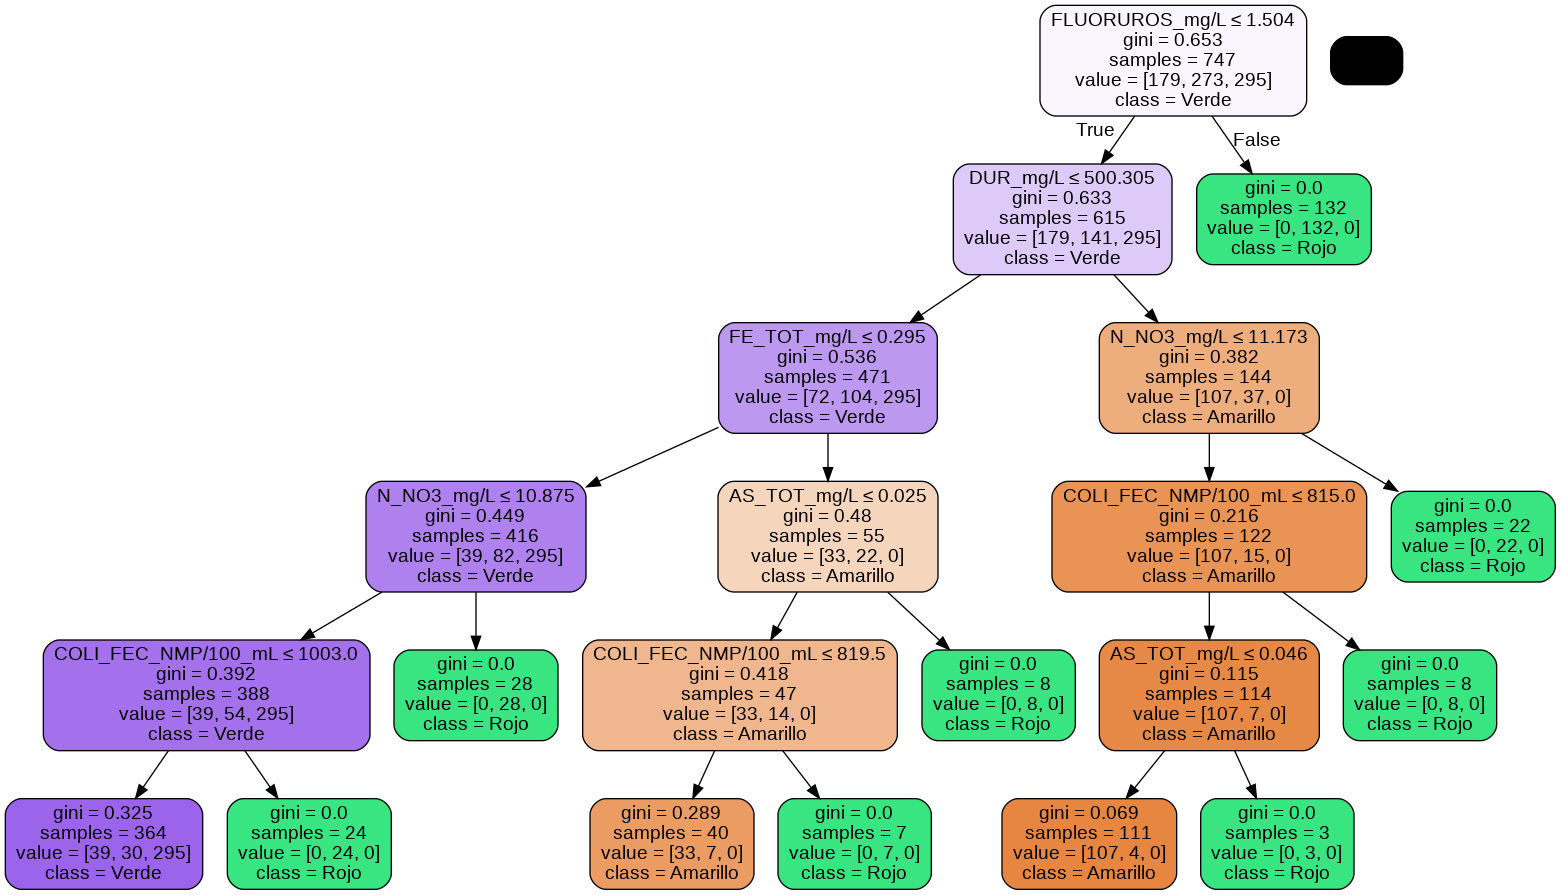

In [ ]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = train_copy.columns,class_names =clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('aguas_subterraneas2.png')
Image(graph.create_png())

Vamos ahora a crear la matriz de correlación

[[ 58   0  10]
 [  8  95  11]
 [  1   0 138]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


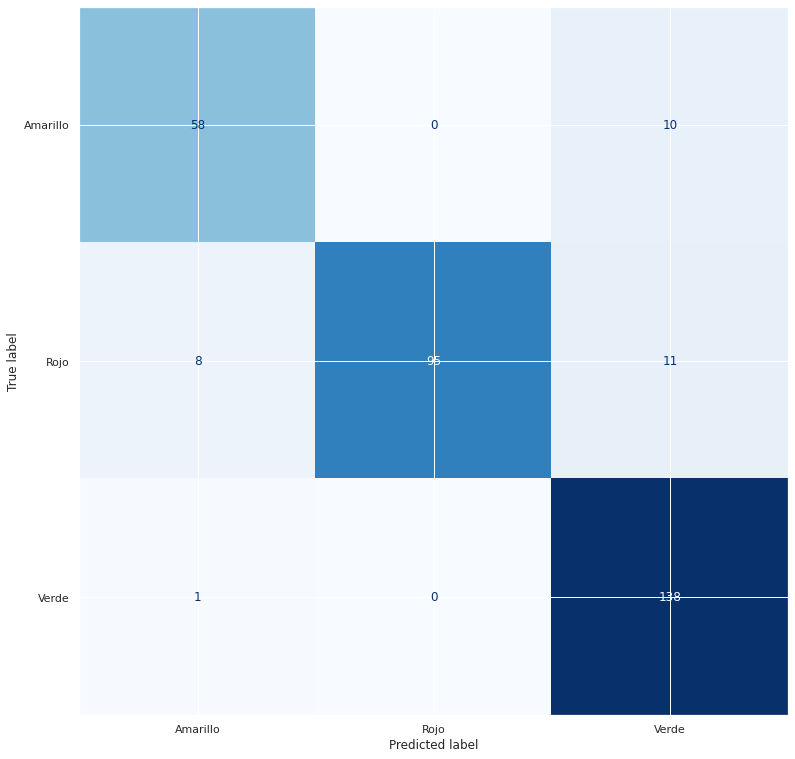

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, cmap = 'Blues', colorbar = False)  
plt.show()

<h2>Random Forest</h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_copy = final_df.copy() 
train_copy.drop(labels = ['SEMAFORO'],axis = 1,inplace = True)
X = train_copy = final_df[['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
                 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']].copy() 
 # Caracteristicas
y = final_df[['SEMAFORO']] # Objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% entrenamiento y 30% prueba

prof_est_score = []
for i in range(3,12):

  #Creaando el clasificador
  for j in range(80,120):
    clf=RandomForestClassifier(n_estimators=j,max_depth=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train.values.ravel())

    y_pred=clf.predict(X_test)
    prof_est_score.append([i,j,metrics.accuracy_score(y_test, y_pred)])

prof_est = pd.DataFrame(prof_est_score,columns = ['Profundidad','Estimadores','Precision'])
prof_est

    # print("Precision de Random Forest con profundidad {}--".format(i),'# estimadores {} ='.format(j),metrics.accuracy_score(y_test, y_pred))


,Profundidad,Estimadores,Precision
0,3,80,0.856698
1,3,81,0.841121
2,3,82,0.881620
3,3,83,0.850467
4,3,84,0.853583
...,...,...,...
355,11,115,0.947040
356,11,116,0.956386
357,11,117,0.953271
358,11,118,0.956386


In [ ]:
#Combinacion de estimador y profundidad que optimiza la precision
maxEst = prof_est.loc[prof_est['Precision'].idxmax()]

#Calculamos el Random Forest con estos valores
clf=RandomForestClassifier(n_estimators=maxEst.Estimadores.astype(int),max_depth=maxEst.Profundidad.astype(int))

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

<p>Revisemos las caracteristicas mas importantes</p>

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)

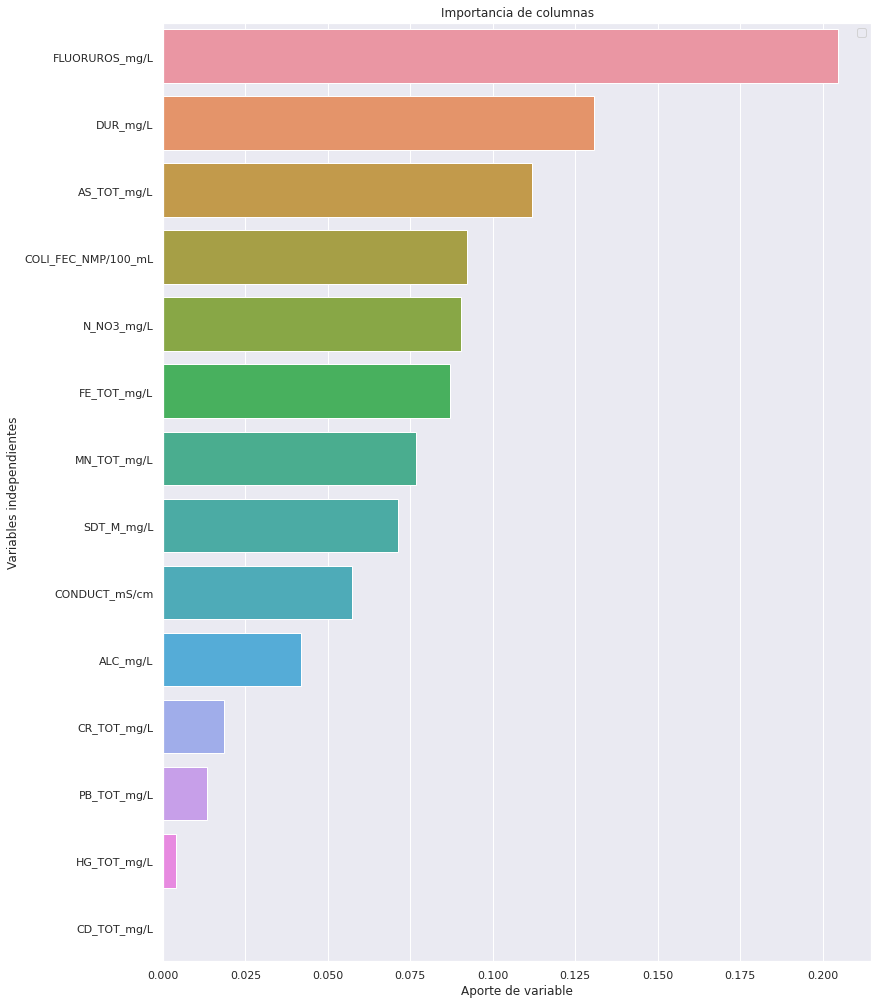

In [ ]:

%matplotlib inline
sns.set(rc={'figure.figsize':(12.7,17.27)})
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Aporte de variable')
plt.ylabel('Variables independientes')
plt.title("Importancia de columnas")
plt.legend()
plt.show()

<p><li>Notamos que hay algunas variables que no aportan mucho.</li></p>
<p><li>Podemos generar un modelo menos robusto que conserve la informacion si removemos las caracteristicas menos importantes</li></p>

In [ ]:
#vamos a remover un tercio de las variables originales
reduced_set = final_df.copy() 
two_thirds= int((len(feature_imp.keys())/3)*2)
reduced_set = reduced_set[feature_imp.keys()[:two_thirds:]]


In [ ]:
X = reduced_set # Caracteristicas
y = final_df[['SEMAFORO']] # Objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

#Creaando el clasificador
clf=RandomForestClassifier(n_estimators=maxEst.Estimadores.astype(int),max_depth=maxEst.Profundidad.astype(int))

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Precision de Random Forest con 1/3 menos:",metrics.accuracy_score(y_test, y_pred))

Precision de Random Forest con 1/3 menos: 0.9439252336448598


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[[ 63   3   2]
 [  9 104   1]
 [  3   0 136]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


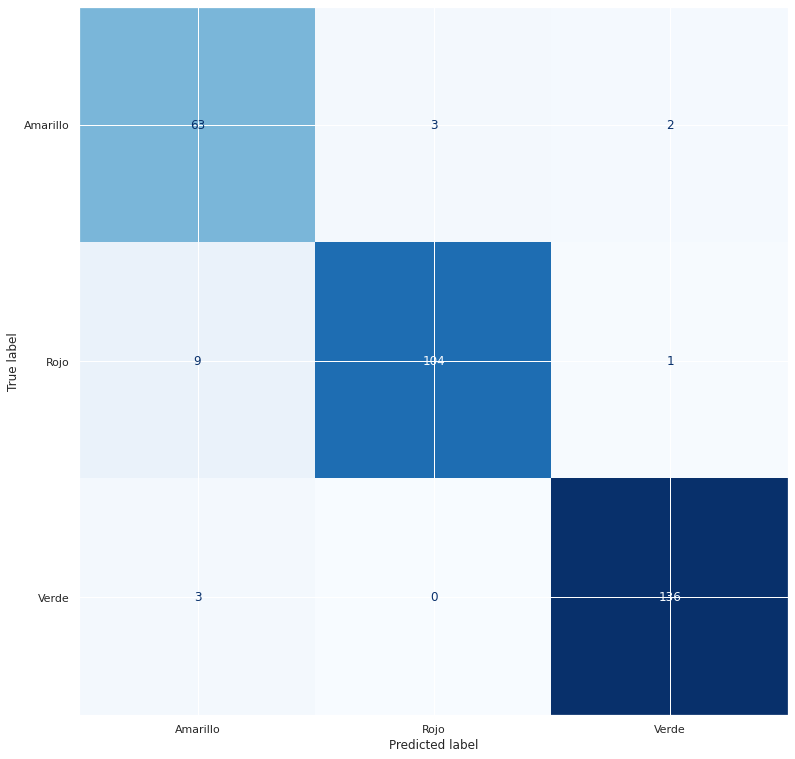

In [ ]:


print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, cmap = 'Blues', colorbar = False)  
plt.show()

<h3>Vemos con con un 1/3 menos de datos no perdemos mucha informacion!</h3>

<h2><li>Ensamble de clasificadores</li></h2>

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
# Creamos los submodelos
estimators = []
model1 = LogisticRegression(max_iter=10000)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(max_depth=7)
estimators.append(('tree', model2))
model3 = SVC()
estimators.append(('svm', model3))
# Creamos el ensamble
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train.values.ravel())
y_pred = ensemble.predict(X_test)
results = model_selection.cross_val_score(ensemble, X, y.values.ravel(), cv=kfold)

print('Validacion cruzada',results)
print("Precision del ensamble:",metrics.accuracy_score(y_test, y_pred))

Validacion cruzada [0.88785047 0.91588785 0.85981308 0.88785047 0.79439252 0.90654206
 0.90654206 0.91588785 0.86792453 0.87735849]
Precision del ensamble: 0.8785046728971962
